In [1]:
classX=[1,0,0,0,1,0,0,1,1,1]
x=[[0,0,1],[0,0,1],[0,1,1],[0,1,1],[1,0,1],[1,0,1],
  [1,0,1],[0,0,0],[1,1,1],[1,0,1]]
m=[.73,.69,.44,.55,.67,.47,.08,.15,.45,.35]

In [2]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x, classX)

predictedValues=[]

predictedValues.append(clf.predict_proba([[0,0,1]])[0][1])
predictedValues.append(clf.predict_proba([[0,0,1]])[0][1])
predictedValues.append(clf.predict_proba([[0,1,1]])[0][1])
predictedValues.append(clf.predict_proba([[0,1,1]])[0][1])
predictedValues.append(clf.predict_proba([[1,0,1]])[0][1])
predictedValues.append(clf.predict_proba([[1,0,1]])[0][1])
predictedValues.append(clf.predict_proba([[1,0,1]])[0][1])
predictedValues.append(clf.predict_proba([[0,0,0]])[0][1])
predictedValues.append(clf.predict_proba([[1,1,1]])[0][1])
predictedValues.append(clf.predict_proba([[1,0,1]])[0][1])
print(predictedValues)

[0.47619047619047616, 0.47619047619047616, 0.39800995024875624, 0.39800995024875624, 0.56939501779359403, 0.56939501779359403, 0.56939501779359403, 0.5, 0.49023362696284961, 0.56939501779359403]


In [3]:
from sklearn import metrics
fpr1, tpr1, thresholds1 = metrics.roc_curve(classX, predictedValues, pos_label=1)
area1=metrics.auc(fpr1, tpr1)

In [4]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(classX, m, pos_label=1)
area2=metrics.auc(fpr2, tpr2)

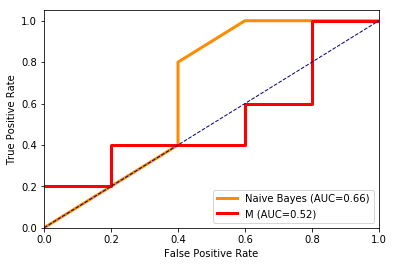

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange',
         lw=3, label='Naive Bayes (AUC=%0.2f)'%area1)

plt.plot(fpr2, tpr2, color='red',
         lw=3, label='M (AUC=%0.2f)'%area2)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

The best model is the naive bayes approach. It is the best because it has the highest area under the curve.

In [6]:
values=[]
for x in range(0,len(predictedValues)):
    if (predictedValues[x]>=0.6):
        values.append(1)
    else:
        values.append(0)

tp=0
tn=0
fn=0
fp=0
for x in range(0,len(classX)):
    if (classX[x]==1 and values[x]==1):
        tp+=1
    elif(classX[x]==0 and values[x]==0):
        tn+=1
    elif(classX[x]==1 and values[x]==0):
        fn+=1
    else:
        fp+=1
if (tp+fp!=0):
    precision=(tp/(tp+fp))
else: precision=0
recall=(tp/(tp+fn))
fMeasure=2*tp/(2*tp+fn+fp)
print('precision: %0.1f, recall: %0.1f, f-measure: %0.1f'%(precision,recall,fMeasure))

precision: 0.0, recall: 0.0, f-measure: 0.0
